In [1]:
import msprime
import demesdraw
import matplotlib.pyplot as plt
import sys
%load_ext rpy2.ipython

In [2]:

mu = 2e-8
r = 1e-8
g = 25

N_A = 20_000
N_B = 20_000
N_C = 20_000
N_D = 20_000
N_E = 20_000
N_AB = 59_000
N_ABC = 34_000
N_ABCD = 10_000
N_ABCDE = 10_000

# Time, in generations, from present to...
#    A/B split for A
t_A = 4_380_000/g
#    A/B split for B
t_B = 4_380_000/g
#    AB/C split for C
t_C = 6_690_000/g
#    ABC/D split for D
t_D = 18_000_000/g
#    ABCD/E split for E
t_E = 30_000_000/g
# Time, in generations, between...
#    A/B and AB/C splits
t_AB = 2_310_000/g # t_C-t_B
#    AB/C and ABC/D splits
t_ABC = 11_310_000/g # t_D-t_C
#    ABC/D and ABCD/E splits
t_ABCD = 12_000_000/g # t_E-t_D

# This is the maximum time in generations from the ABCD/E split to present
t_1 = max([t_A+t_AB+t_ABC+t_ABCD, t_B+t_AB+t_ABC+t_ABCD, t_C+t_ABC+t_ABCD, t_D+t_ABCD, t_E])

In [3]:
model_1 = msprime.Demography()
model_1.add_population(name="A", initial_size=N_A, default_sampling_time=t_1-(t_A+t_AB+t_ABC+t_ABCD))
model_1.add_population(name="B", initial_size=N_B, default_sampling_time=t_1-(t_B+t_AB+t_ABC+t_ABCD))
model_1.add_population(name="C", initial_size=N_C, default_sampling_time=t_1-(t_C+t_ABC+t_ABCD))
model_1.add_population(name="D", initial_size=N_D, default_sampling_time=t_1-(t_D+t_ABCD))
model_1.add_population(name="E", initial_size=N_E, default_sampling_time=t_1-t_E)
model_1.add_population(name="AB", initial_size=N_AB)
model_1.add_population(name="ABC", initial_size=N_ABC)
model_1.add_population(name="ABCD", initial_size=N_ABCD)
model_1.add_population(name="ABCDE", initial_size=N_ABCDE)
model_1.add_population_split(time=t_1-(t_AB+t_ABC+t_ABCD), derived=["A", "B"], ancestral="AB")
model_1.add_population_split(time=t_1-(t_ABC+t_ABCD), derived=["AB", "C"], ancestral="ABC")
model_1.add_population_split(time=t_1-t_ABCD, derived=["ABC", "D"], ancestral="ABCD")
model_1.add_population_split(time=t_1, derived=["ABCD", "E"], ancestral="ABCDE")

PopulationSplit(time=1200000.0, derived=['ABCD', 'E'], ancestral='ABCDE')

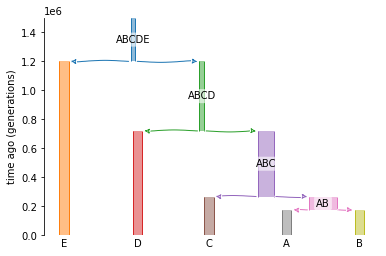

In [4]:
graph = msprime.Demography.to_demes(model_1)
fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
demesdraw.tubes(graph, ax=ax, seed=1)
plt.show()

In [5]:
2_310_000/3*2

1540000.0

In [6]:
N_A_prime = 20_000
N_B_prime = 20_000
N_AB_prime = 59_000
# Time, in generations, between...
#    A'/B' admixture event and AB'/C split
t_admix = 1_540_000/g
#    A'/B' split and AB'/C split
t_split = 770_000/g

# Admixture proportion
m = 0.3


model_2 = msprime.Demography()
model_2.add_population(name="A", initial_size=N_A, default_sampling_time=t_1-(t_A+t_AB+t_ABC+t_ABCD))
model_2.add_population(name="B", initial_size=N_B, default_sampling_time=t_1-(t_B+t_AB+t_ABC+t_ABCD))
model_2.add_population(name="A_prime", initial_size=N_A_prime, initially_active=False)
model_2.add_population(name="B_prime", initial_size=N_B_prime, initially_active=False)
model_2.add_population(name="C", initial_size=N_C, default_sampling_time=t_1-(t_C+t_ABC+t_ABCD))
model_2.add_population(name="D", initial_size=N_D, default_sampling_time=t_1-(t_D+t_ABCD))
model_2.add_population(name="E", initial_size=N_E, default_sampling_time=t_1-t_E)
model_2.add_population(name="AB", initial_size=N_AB)
model_2.add_population(name="AB_prime", initial_size=N_AB_prime)
model_2.add_population(name="ABC", initial_size=N_ABC)
model_2.add_population(name="ABCD", initial_size=N_ABCD)
model_2.add_population(name="ABCDE", initial_size=N_ABCDE)
model_2.add_population_split(time=t_1-(t_AB+t_ABC+t_ABCD), derived=["A", "B"], ancestral="AB")
model_2.add_admixture(time = t_1-(t_admix+t_ABC+t_ABCD), derived="AB", ancestral=["A_prime", "B_prime"], proportions=(m, 1-m))
model_2.add_population_split(time=t_1-(t_split+t_ABC+t_ABCD), derived=["A_prime", "B_prime"], ancestral="AB_prime")
model_2.add_population_split(time=t_1-(t_ABC+t_ABCD), derived=["AB_prime", "C"], ancestral="ABC")
model_2.add_population_split(time=t_1-t_ABCD, derived=["ABC", "D"], ancestral="ABCD")
model_2.add_population_split(time=t_1, derived=["ABCD", "E"], ancestral="ABCDE")

PopulationSplit(time=1200000.0, derived=['ABCD', 'E'], ancestral='ABCDE')

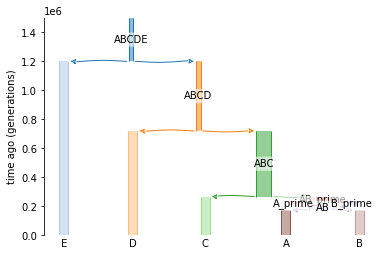

In [7]:
graph = msprime.Demography.to_demes(model_2)
fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
demesdraw.tubes(graph, ax=ax, seed=1)
plt.show()

In [8]:
4_380_000/2

2190000.0

In [9]:
N_A_prime = 20_000
N_A_prime_prime = 20_000
N_AB_prime = 59_000
# Time, in generations, between...
#    A'/A'' admixture event and A'/B split
t_admix = 2_190_000/g
#    A''/AB split and AB'/C split
t_split = 1_155_000/g

# Admixture proportion
m = 0.3


model_3 = msprime.Demography()
model_3.add_population(name="A", initial_size=N_A, default_sampling_time=t_1-(t_A+t_AB+t_ABC+t_ABCD))
model_3.add_population(name="B", initial_size=N_B, default_sampling_time=t_1-(t_B+t_AB+t_ABC+t_ABCD))
model_3.add_population(name="A_prime", initial_size=N_A_prime, initially_active=False)
model_3.add_population(name="A_prime_prime", initial_size=N_A_prime_prime, initially_active=False)
model_3.add_population(name="C", initial_size=N_C, default_sampling_time=t_1-(t_C+t_ABC+t_ABCD))
model_3.add_population(name="D", initial_size=N_D, default_sampling_time=t_1-(t_D+t_ABCD))
model_3.add_population(name="E", initial_size=N_E, default_sampling_time=t_1-t_E)
model_3.add_population(name="AB", initial_size=N_AB)
model_3.add_population(name="AB_prime", initial_size=N_AB_prime)
model_3.add_population(name="ABC", initial_size=N_ABC)
model_3.add_population(name="ABCD", initial_size=N_ABCD)
model_3.add_population(name="ABCDE", initial_size=N_ABCDE)
model_3.add_admixture(time = t_1-(t_admix+t_AB+t_ABC+t_ABCD), derived="A", ancestral=["A_prime_prime", "A_prime"], proportions=(m, 1-m))
model_3.add_population_split(time=t_1-(t_AB+t_ABC+t_ABCD), derived=["A_prime", "B"], ancestral="AB")
model_3.add_population_split(time=t_1-(t_split+t_ABC+t_ABCD), derived=["A_prime_prime", "AB"], ancestral="AB_prime")
model_3.add_population_split(time=t_1-(t_ABC+t_ABCD), derived=["AB_prime", "C"], ancestral="ABC")
model_3.add_population_split(time=t_1-t_ABCD, derived=["ABC", "D"], ancestral="ABCD")
model_3.add_population_split(time=t_1, derived=["ABCD", "E"], ancestral="ABCDE")

PopulationSplit(time=1200000.0, derived=['ABCD', 'E'], ancestral='ABCDE')

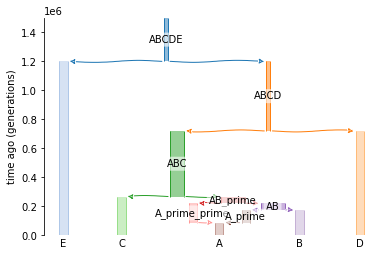

In [10]:
graph = msprime.Demography.to_demes(model_3)
fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
demesdraw.tubes(graph, ax=ax, seed=1)
plt.show()

In [11]:
n_sites = 10_000

seed = 3

ts_model_1 = msprime.sim_ancestry(
    {"A": 1, "B": 1, "C": 1,
     "D": 1, "E" : 1
    },
    demography=model_1,
    recombination_rate=r,
    sequence_length=n_sites,
    ploidy=1,
    random_seed=seed
)
mts_model_1 = msprime.sim_mutations(ts_model_1, rate=mu, random_seed=seed)

ts_model_2 = msprime.sim_ancestry(
    {"A": 1, "B": 1, "C": 1,
     "D": 1, "E" : 1
    },
    demography=model_2,
    recombination_rate=r,
    sequence_length=n_sites,
    ploidy=1,
    random_seed=seed
)
mts_model_2 = msprime.sim_mutations(ts_model_1, rate=mu, random_seed=seed)

ts_model_3 = msprime.sim_ancestry(
    {"A": 1, "B": 1, "C": 1,
     "D": 1, "E" : 1
    },
    demography=model_3,
    recombination_rate=r,
    sequence_length=n_sites,
    ploidy=1,
    random_seed=seed
)
mts_model_3 = msprime.sim_mutations(ts_model_3, rate=mu, random_seed=seed)

In [12]:
mts_model_1.write_vcf(sys.stdout)

##fileformat=VCFv4.2
##source=tskit 0.5.3
##FILTER=<ID=PASS,Description="All filters passed">
##contig=<ID=1,length=10000>
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	tsk_0	tsk_1	tsk_2	tsk_3	tsk_4
1	38	0	T	A	.	PASS	.	GT	0	1	0	0	0
1	40	1	T	A	.	PASS	.	GT	0	0	0	0	1
1	47	2	C	G	.	PASS	.	GT	1	0	0	0	0
1	54	3	A	G	.	PASS	.	GT	0	0	1	0	0
1	59	4	C	G	.	PASS	.	GT	0	0	0	0	1
1	116	5	T	G	.	PASS	.	GT	0	0	0	0	1
1	141	6	G	C	.	PASS	.	GT	0	0	0	1	0
1	177	7	T	C	.	PASS	.	GT	0	0	1	0	0
1	179	8	T	C	.	PASS	.	GT	1	1	1	0	0
1	183	9	T	A	.	PASS	.	GT	0	1	0	0	0
1	210	10	T	G	.	PASS	.	GT	0	0	0	1	0
1	227	11	G	T	.	PASS	.	GT	0	1	0	0	0
1	232	12	A	C	.	PASS	.	GT	0	0	1	0	0
1	263	13	T	G	.	PASS	.	GT	1	1	1	1	0
1	266	14	T	A	.	PASS	.	GT	0	0	0	0	1
1	282	15	G	C	.	PASS	.	GT	0	0	0	1	0
1	293	16	A	G	.	PASS	.	GT	0	1	0	0	0
1	308	17	T	C	.	PASS	.	GT	0	0	1	0	0
1	344	18	T	C	.	PASS	.	GT	1	1	1	0	0
1	349	19	T	A	.	PASS	.	GT	0	0	0	1	0
1	372	20	G	A	.	PASS	.	GT	0	0	1	0	0
1	409	21	T	G	.	PASS	

In [13]:
mts_model_2.write_vcf(sys.stdout)

##fileformat=VCFv4.2
##source=tskit 0.5.3
##FILTER=<ID=PASS,Description="All filters passed">
##contig=<ID=1,length=10000>
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	tsk_0	tsk_1	tsk_2	tsk_3	tsk_4
1	38	0	T	A	.	PASS	.	GT	0	1	0	0	0
1	40	1	T	A	.	PASS	.	GT	0	0	0	0	1
1	47	2	C	G	.	PASS	.	GT	1	0	0	0	0
1	54	3	A	G	.	PASS	.	GT	0	0	1	0	0
1	59	4	C	G	.	PASS	.	GT	0	0	0	0	1
1	116	5	T	G	.	PASS	.	GT	0	0	0	0	1
1	141	6	G	C	.	PASS	.	GT	0	0	0	1	0
1	177	7	T	C	.	PASS	.	GT	0	0	1	0	0
1	179	8	T	C	.	PASS	.	GT	1	1	1	0	0
1	183	9	T	A	.	PASS	.	GT	0	1	0	0	0
1	210	10	T	G	.	PASS	.	GT	0	0	0	1	0
1	227	11	G	T	.	PASS	.	GT	0	1	0	0	0
1	232	12	A	C	.	PASS	.	GT	0	0	1	0	0
1	263	13	T	G	.	PASS	.	GT	1	1	1	1	0
1	266	14	T	A	.	PASS	.	GT	0	0	0	0	1
1	282	15	G	C	.	PASS	.	GT	0	0	0	1	0
1	293	16	A	G	.	PASS	.	GT	0	1	0	0	0
1	308	17	T	C	.	PASS	.	GT	0	0	1	0	0
1	344	18	T	C	.	PASS	.	GT	1	1	1	0	0
1	349	19	T	A	.	PASS	.	GT	0	0	0	1	0
1	372	20	G	A	.	PASS	.	GT	0	0	1	0	0
1	409	21	T	G	.	PASS	

In [14]:
mts_model_3.write_vcf(sys.stdout)

##fileformat=VCFv4.2
##source=tskit 0.5.3
##FILTER=<ID=PASS,Description="All filters passed">
##contig=<ID=1,length=10000>
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	tsk_0	tsk_1	tsk_2	tsk_3	tsk_4
1	3	0	A	T	.	PASS	.	GT	1	1	1	1	0
1	26	1	C	G	.	PASS	.	GT	0	0	0	0	1
1	27	2	C	T	.	PASS	.	GT	0	0	0	1	0
1	51	3	G	C	.	PASS	.	GT	0	0	0	0	1
1	66	4	C	G	.	PASS	.	GT	0	0	1	0	0
1	83	5	G	T	.	PASS	.	GT	0	0	0	1	0
1	111	6	T	C	.	PASS	.	GT	1	1	1	0	0
1	118	7	G	A	.	PASS	.	GT	0	0	0	0	1
1	170	8	A	G	.	PASS	.	GT	1	1	1	1	0
1	183	9	G	C	.	PASS	.	GT	0	0	0	1	0
1	190	10	C	G	.	PASS	.	GT	1	0	0	0	0
1	206	11	G	A	.	PASS	.	GT	0	0	0	1	0
1	208	12	A	C	.	PASS	.	GT	0	0	0	1	0
1	212	13	C	T	.	PASS	.	GT	1	1	1	1	0
1	222	14	A	C	.	PASS	.	GT	0	0	1	0	0
1	227	15	G	A	.	PASS	.	GT	0	0	0	1	0
1	264	16	T	A	.	PASS	.	GT	0	0	0	0	1
1	278	17	A	T	.	PASS	.	GT	0	0	1	0	0
1	282	18	C	T	.	PASS	.	GT	1	1	1	1	0
1	314	19	C	G	.	PASS	.	GT	0	0	1	0	0
1	317	20	C	A,G	.	PASS	.	GT	0	0	0	2	1
1	328	21	C	G	.	PASS	

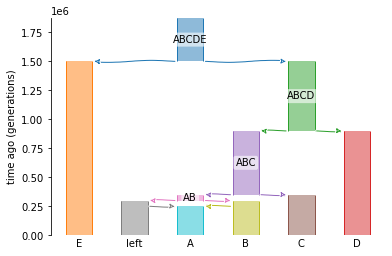

In [16]:
def create_demography(file):
    # read a file specifying the demography
    GEN_TIME=20
    with open(file) as f:
        demography = msprime.Demography()
        for line in f:
            l = line.split()
            if l[0] == "pop":
                demography.add_population(name=l[1], initial_size=int(l[2]))
            elif l[0] == "bottleneck":
                demography.add_instantaneous_bottleneck(time=int(l[1]) / GEN_TIME, strength=int(l[2]), population=l[3])
            elif l[0] == "split":
                derived = list(l[2].split("/"))
                demography.add_population_split(time=int(l[1]) / GEN_TIME, derived=derived, ancestral=l[3])
            elif l[0] == 'admixture':
                derived = l[2]
                ancestral = list(l[3].split("/"))
                proportions = [float(props) for props in list(l[4].split("/"))]
                demography.add_admixture(time=int(l[1]) / GEN_TIME, derived=derived, ancestral=ancestral, proportions=proportions)
    return(demography)

m_arun = create_demography('M02a')
graph = msprime.Demography.to_demes(m_arun)
fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
demesdraw.tubes(graph, ax=ax, seed=1)
plt.show()

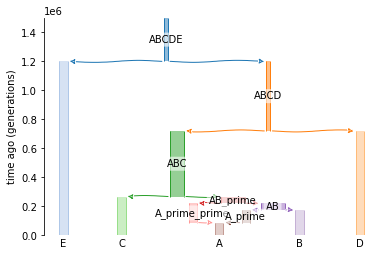

In [17]:
graph = msprime.Demography.to_demes(model_3)
fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
demesdraw.tubes(graph, ax=ax, seed=1)
plt.show()